# Introduction 

## Table of contents

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

# Simplify the dataframe to only include relevant columns for this analysis
# Save df into a new variable to keep the original
df2 = df[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'ListingCategory (numeric)', 'EstimatedReturn', 'LenderYield', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'IncomeRange', 'MonthlyLoanPayment']]

# high-level overview of data shape and composition
print(df2.shape)
print(df2.info())

(113937, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                    113937 non-null object
ListingCreationDate           113937 non-null object
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
ListingCategory (numeric)     113937 non-null int64
EstimatedReturn               84853 non-null float64
LenderYield                   113937 non-null float64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
IncomeRange                   113937 non-null object
MonthlyLoanPayment            113937 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 12.3+ MB
None


In [8]:
# Visual assessment
df2.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0,NaN,0.1380,Self-employed,True,640.0,78,9425,"$25,000-49,999",330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,2,0.05470,0.0820,Employed,False,680.0,0,10000,"$50,000-74,999",318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0,NaN,0.2400,Not available,False,480.0,86,3001,Not displayed,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,16,0.06000,0.0874,Employed,True,800.0,16,10000,"$25,000-49,999",321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,2,0.09066,0.1985,Employed,True,680.0,6,15000,"$100,000+",563.97


We notice that it's going to be difficult to use the credit score column since its values are not continuous. Let's create categories for different credit scores to analysis this better. 

In [9]:
# convert Credit Score into ordered categorical values

# Bin edges 
bin_edges = [0, 1, 579, 669, 739, 799, 900] 

# Labels for our credit scores
bin_names = ['None', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Creates CreditScore column
df2['CreditScore'] = pd.cut(df2['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Let's take a randon sample to see if our categories work
df2.sample(5)

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment,CreditScore
49386,EAE9357897445613452B512,2013-05-07 11:10:16.577000000,60,Completed,0.14453,1,0.0727,0.1119,Employed,True,720.0,10,10000,"$50,000-74,999",223.41,Good
1087,3FD33581102163875B28F41,2013-06-24 03:32:38.063000000,60,Current,0.14453,1,0.0727,0.1119,Employed,True,780.0,9,10000,"$25,000-49,999",223.41,Very Good
16401,12BB35527602941044BE4F7,2012-07-11 16:40:31.230000000,36,Current,0.19921,2,0.0935,0.1526,Employed,True,700.0,20,3000,"$25,000-49,999",105.86,Good
12588,556E33980841338401D77A7,2007-08-28 23:33:42.483000000,36,Completed,0.18686,0,NaN,0.1696,Full-time,False,640.0,78,2500,"$50,000-74,999",90.33,Fair
84043,1F483499698106644016309,2010-11-11 17:02:53.177000000,36,Completed,0.17069,1,0.0772,0.1390,Employed,True,740.0,40,7500,"$75,000-99,999",259.62,Very Good


Convert numeric values to names

In [10]:
df2['ListingCategory (numeric)'] = df2['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})


C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
df2['ListingCategory'] = df2['ListingCategory (numeric)']

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2[df2['ListingCategory'] == "Personal Loan"]

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment,CreditScore,ListingCategory
121,119034109962969937581AB,2008-01-20 05:58:31.303000000,36,Completed,0.15428,Personal Loan,NaN,0.1300,Full-time,True,700.0,74,4000,"$75,000-99,999",136.71,Good,Personal Loan
222,2F2234069312657701D0A5C,2007-12-06 20:01:37.313000000,36,Defaulted,0.12720,Personal Loan,NaN,0.1202,Full-time,True,780.0,75,25000,"$100,000+",830.60,Very Good,Personal Loan
345,31003414136001733EF98F2,2008-02-26 08:53:15.823000000,36,Completed,0.08991,Personal Loan,NaN,0.0868,Full-time,True,780.0,72,5500,"$50,000-74,999",172.31,Very Good,Personal Loan
367,00EA3417467785833467587,2008-04-17 06:10:43.373000000,36,Completed,0.30704,Personal Loan,NaN,0.2735,Full-time,False,560.0,71,1545,"$1-24,999",0.00,Very Poor,Personal Loan
421,31773411053375955CA3F3E,2008-01-18 15:07:50.917000000,36,Completed,0.24264,Personal Loan,NaN,0.2100,Full-time,False,560.0,73,1000,"$50,000-74,999",38.19,Very Poor,Personal Loan
533,3BE4341927911764278B293,2008-05-02 20:53:06.250000000,36,Completed,0.15629,Personal Loan,NaN,0.1320,Full-time,True,680.0,70,5000,"$100,000+",168.64,Good,Personal Loan
739,312334218045842214E5187,2008-06-05 08:52:36.873000000,36,Completed,0.12562,Personal Loan,NaN,0.0945,Full-time,False,660.0,69,2000,"$25,000-49,999",45.97,Fair,Personal Loan
743,3146342014834032651EEC1,2008-04-24 12:57:41.427000000,36,Completed,0.12562,Personal Loan,NaN,0.0945,Full-time,False,640.0,70,7400,"$50,000-74,999",240.34,Fair,Personal Loan
762,0A5F3416951046081827F5C,2008-03-22 03:25:58.510000000,36,Completed,0.13209,Personal Loan,NaN,0.1080,Part-time,False,700.0,71,3500,"$1-24,999",115.92,Good,Personal Loan
790,012034185451269012303F2,2008-04-24 16:42:57.920000000,36,Completed,0.07045,Personal Loan,NaN,0.0400,Full-time,False,580.0,70,1000,"$25,000-49,999",0.00,Fair,Personal Loan


In [13]:
print(df2.Term.unique())
print(df2.IncomeRange.unique())
print(df2.CreditScore.unique())

[36 60 12]
['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']
[Fair, Good, Very Poor, Exceptional, Very Good, NaN]
Categories (5, object): [Very Poor < Fair < Good < Very Good < Exceptional]


In [14]:
# convert Term, IncomeRange, CreditScoreRangeLower, into ordered categorical types
ordinal_var_dict = {
                    'Term':        [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                    'LoanStatus':  ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Test

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
ListingKey                    113937 non-null object
ListingCreationDate           113937 non-null object
Term                          113937 non-null category
LoanStatus                    113937 non-null category
BorrowerAPR                   113912 non-null float64
ListingCategory (numeric)     113937 non-null object
EstimatedReturn               84853 non-null float64
LenderYield                   113937 non-null float64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CreditScoreRangeLower         113346 non-null float64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
IncomeRange                   113937 non-null category
MonthlyLoanPayment            113937 non-null float64
CreditScore                   113213 non-null category
ListingCategory               113

## Univariate Data Exploration

### Quantitative Variables

#### Borrower APR

Text(0.5, 0, 'Borrower APR')

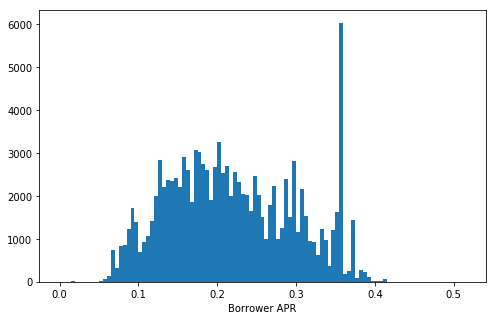

In [16]:
binsize = 0.005
bins = np.arange(0, df2.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')

Borrower APR is slightly skewed to the left. We can see some peaks throughout the whole distribution, the most obvious one being at 3.5. This seems to show that there are certain preconstructed borrower annual percentage rates.  

In [17]:
df2.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

#### Estimated Return

(0, 0.25)

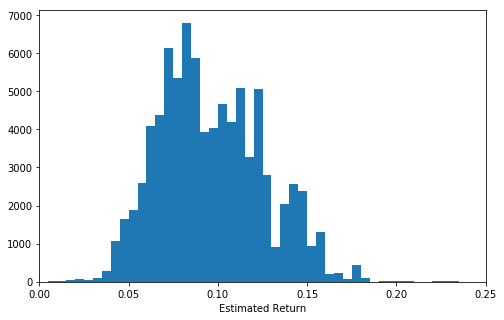

In [18]:
binsize = 0.005
bins = np.arange(0, df2.EstimatedReturn.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'EstimatedReturn', bins = bins);
plt.xlabel('Estimated Return')
plt.xlim(0, 0.25)

In [19]:
df2.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

#### Loan Months Since Origination 

Text(0.5, 0, 'Loan Months Since Origination')

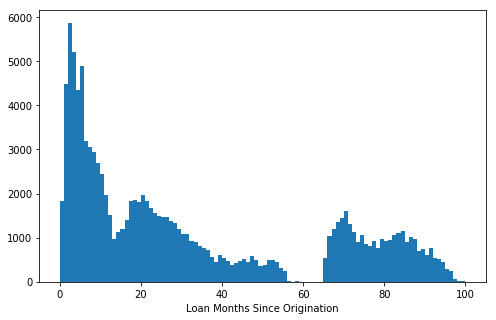

In [20]:
binsize = 1
bins = np.arange(0, df2.LoanMonthsSinceOrigination.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanMonthsSinceOrigination', bins = bins);
plt.xlabel('Loan Months Since Origination')

#### Loan Original Amount

In [21]:
df2.LoanOriginalAmount.dtype

dtype('int64')

Text(0.5, 0, 'Loan Original Amount')

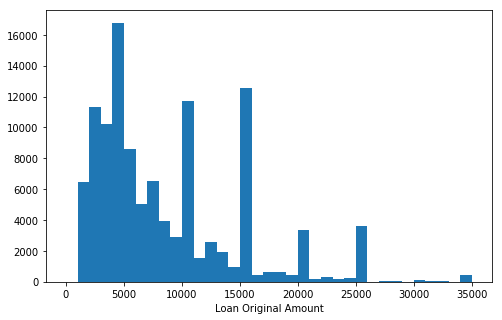

In [22]:
binsize = 1000
bins = np.arange(0, df2.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount')

<b>Log Loan Original Amount</b>

(600, 50000)

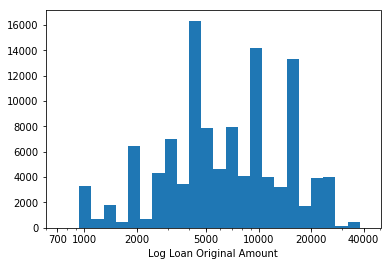

In [23]:
log_binsize = 0.07
bins = 10 ** np.arange(1.5, np.log(df2.LoanOriginalAmount.max())+log_binsize, log_binsize)
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.hist(data = df2, x= 'LoanOriginalAmount', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Loan Original Amount')
plt.xlim(600, 50000)

#### Monthly Loan Payment

Text(0.5, 0, 'Monthly Loan Payment')

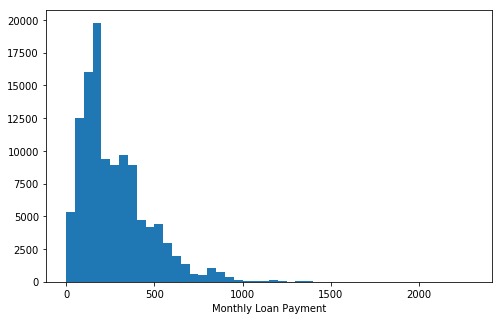

In [24]:
binsize = 50
bins = np.arange(0, df2.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment')


<b>Log Monthly Loan Payment</b>

(20, 2500)

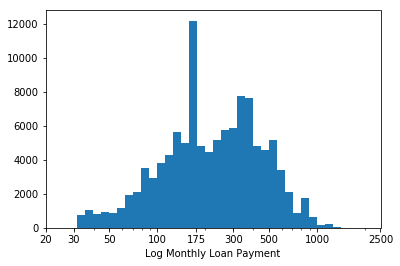

In [25]:
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log(df2.MonthlyLoanPayment.max())+log_binsize, log_binsize)
ticks = [20, 30, 50, 100, 175, 300, 500, 1000, 2500]

plt.hist(data = df2, x= 'MonthlyLoanPayment', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Monthly Loan Payment')
plt.xlim(20, 2500)

### Ordinal Variables 

#### Term, Income Range and Credit Score

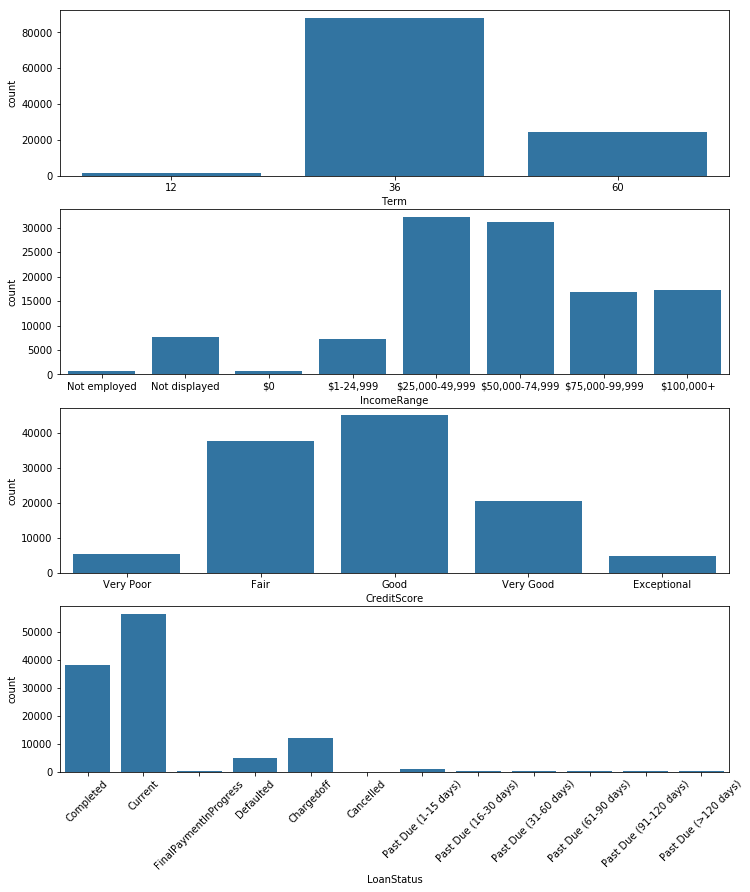

In [26]:
# let's plot all three ordinary variables together to get an idea of each distribution.

fig, ax = plt.subplots(nrows=4, figsize = [12,14])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df2, x = 'IncomeRange', color = default_color, ax = ax[1])
sb.countplot(data = df2, x = 'CreditScore', color = default_color, ax = ax[2])
sb.countplot(data = df2, x = 'LoanStatus', color = default_color, ax = ax[3])

plt.xticks(rotation= 45)

plt.show()

### Categorical Variables 

### Employment Status, Is Borrower Homeowner	

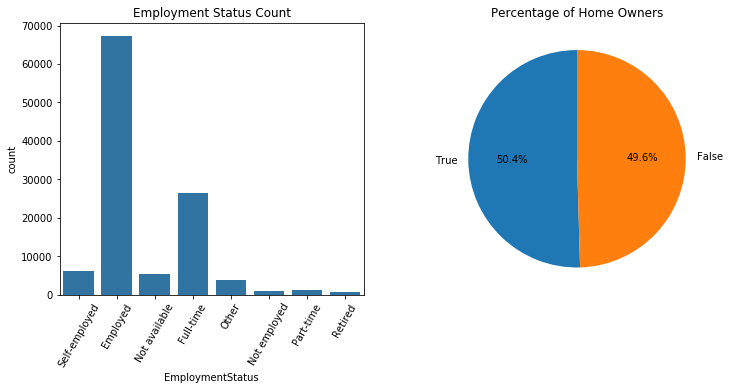

In [27]:
fig, ax = plt.subplots(ncols=2, figsize = [12,5])

default_color = sb.color_palette()[0]

sb.countplot(data = df2, x = 'EmploymentStatus', color = default_color, ax = ax[0])
plt.pie(df2.IsBorrowerHomeowner.value_counts().values, labels = df2.IsBorrowerHomeowner.value_counts().index,
        startangle = 90, autopct='%0.01f%%');

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=60)

ax[0].set_title('Employment Status Count')
ax[1].set_title('Percentage of Home Owners')

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

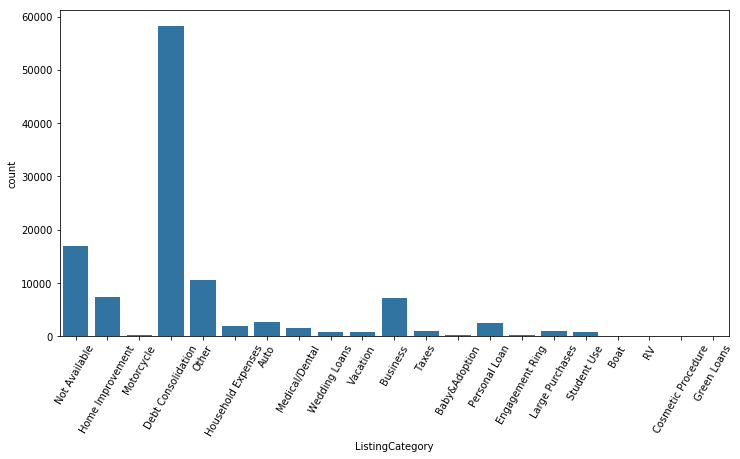

In [28]:

plt.figure(figsize = [12, 6])
default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'ListingCategory', color = default_color)
plt.xticks(rotation = 60)

##  

## Bivariate Data Exploration 

### Correlations 
Let's look at pairwise correlations present between features in the data.

In [29]:
numeric_vars = ['EstimatedReturn', 'BorrowerAPR', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['IncomeRange', 'CreditScore', 'IsBorrowerHomeowner']

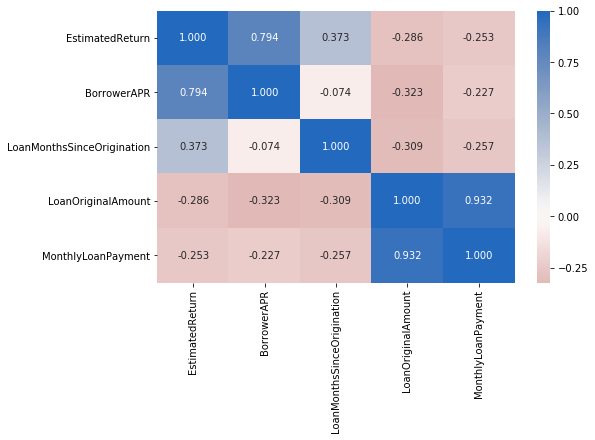

In [30]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [31]:
# plot matrix: sample 500 data points so that plots are clearer and
# they render faster
samples = np.random.choice(df2.shape[0], 500, replace = False)
df2_samp = df2.loc[samples,:]

C:\Users\nasty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nasty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


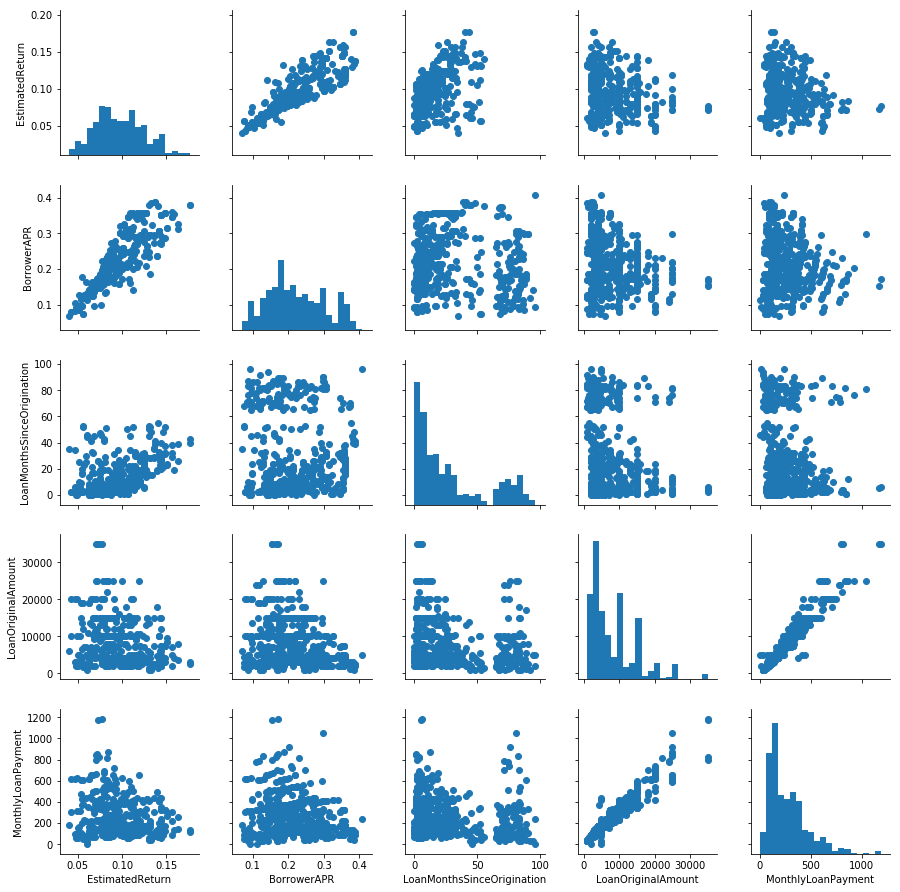

In [32]:
g = sb.PairGrid(data = df2_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Let's create a log function to scale some of our variables.

In [33]:
# log function to easily transform data to its log values
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

Let's check what types of loans yeild the highest returns. Does the amount loaned have an impact on yeild? 

C:\Users\nasty\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 0, 'Log Loan Original Amount')

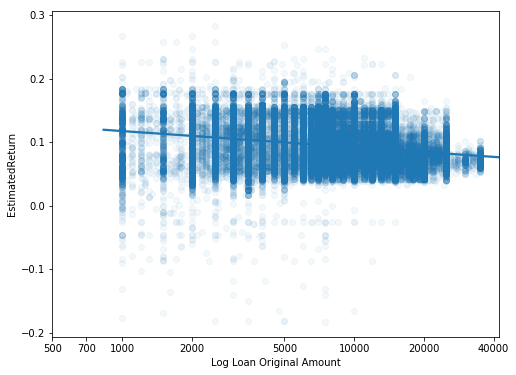

In [34]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df2['log_loan_amount'] = df2['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

sb.regplot(data = df2, x= 'log_loan_amount', y = 'EstimatedReturn', scatter_kws={'alpha':0.05});

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')


We can see a slight negative correlation between the Estimated Return and the log of the Loan Amount. However, if on average smaller loans tend to yield higher returns, there is also more variability in returns the smaller the loan. 

This means that there is more risk associated with smaller loans. 

Let's look at if the number of months of a loan has an impact on return. 

In [35]:
# take only the completed loans
df2_completed = df2.query('LoanStatus == "Completed"')

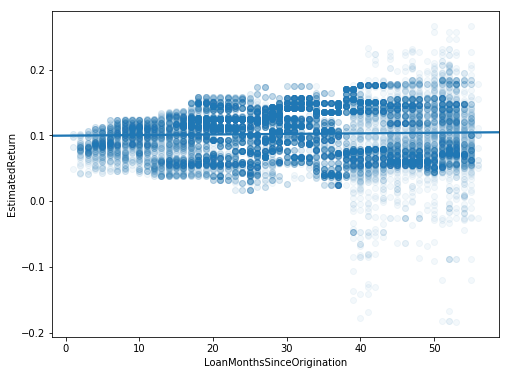

In [36]:
# Create visualization
plt.figure(figsize = [8, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

sb.regplot(data = df2_completed, x= 'LoanMonthsSinceOrigination', y = 'EstimatedReturn', scatter_kws={'alpha':0.05});



The duration of the loan seems to have no impact on return. We can see from this graph however that longer loans are riskier since they have higher variability in return. 

In [37]:
THRESHOLD = 2500
loan_frequency = df2['ListingCategory'].value_counts()
idx = np.sum(loan_frequency > THRESHOLD)

most_loans = loan_frequency.index[:idx]
df2_sub = df2.loc[df2['ListingCategory'].isin(most_loans)]

loan_mean = df2_sub.groupby('ListingCategory').mean()
# comb_order = loan_means.sort_values('comb', ascending = False).index
df2_sub['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Name: ListingCategory, dtype: int64

In [38]:
loan_mean.EstimatedReturn

ListingCategory
Auto                  0.104257
Business              0.103527
Debt Consolidation    0.092565
Home Improvement      0.099917
Not Available         0.106649
Other                 0.103885
Name: EstimatedReturn, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

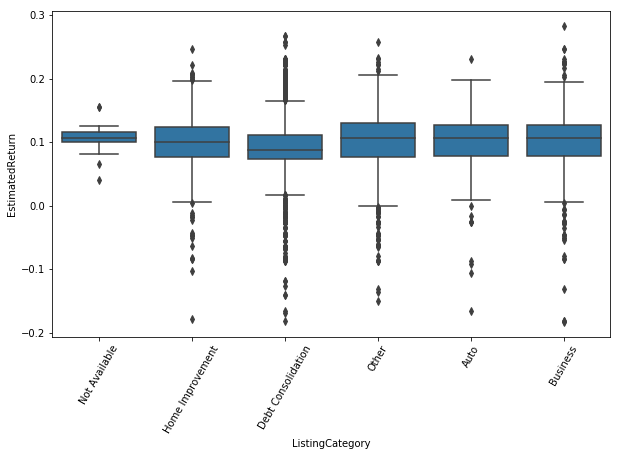

In [39]:
plt.figure(figsize = [10, 6])
sb.boxplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn', color = default_color)
plt.xticks(rotation = 60)

Let's plot the average Estimated Return for the most popular loans

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

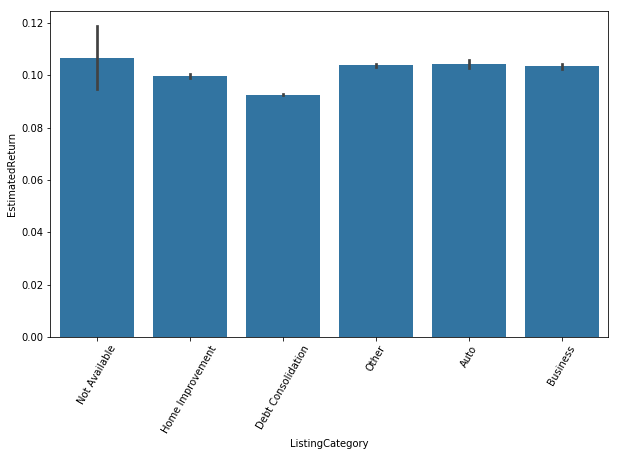

In [40]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.barplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn', color = base_color)
plt.xticks(rotation = 60)

As we can tell, investing in a Home Improvement Loan and Dept Consolidation is slightly less profitable and the others. 

Let's look at Borrower APR as well as Estimated Return rates and compare them to different categorical and ordinal variables. 

<b>BorrowerAPR and Estimated Return VS Credit Score and Income Range</b>

<Figure size 1296x720 with 0 Axes>

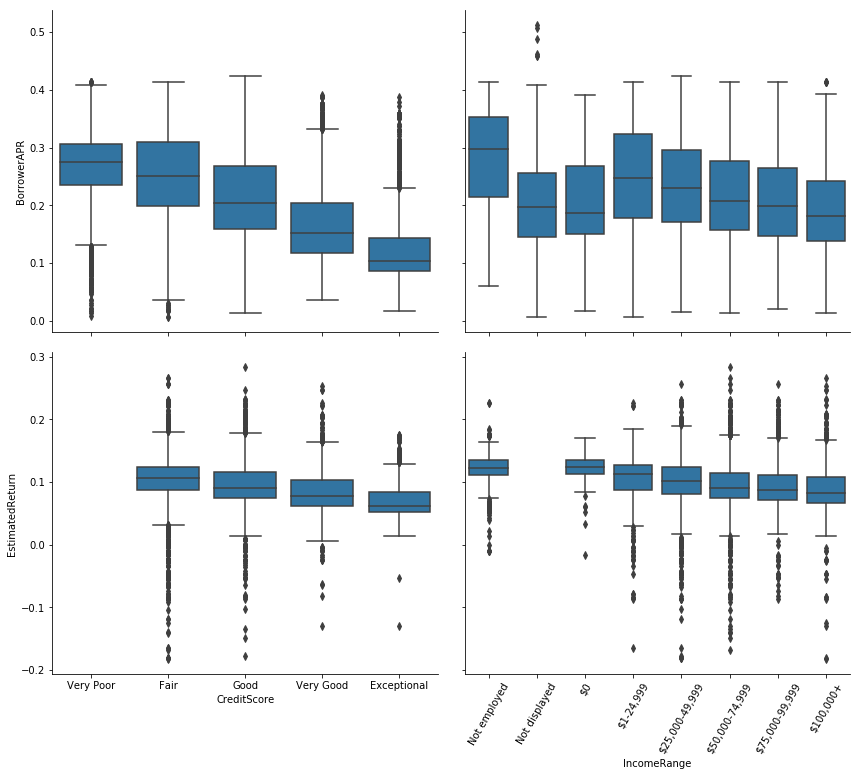

In [41]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Is Homeowner and Employment Status</b>

<Figure size 1296x1080 with 0 Axes>

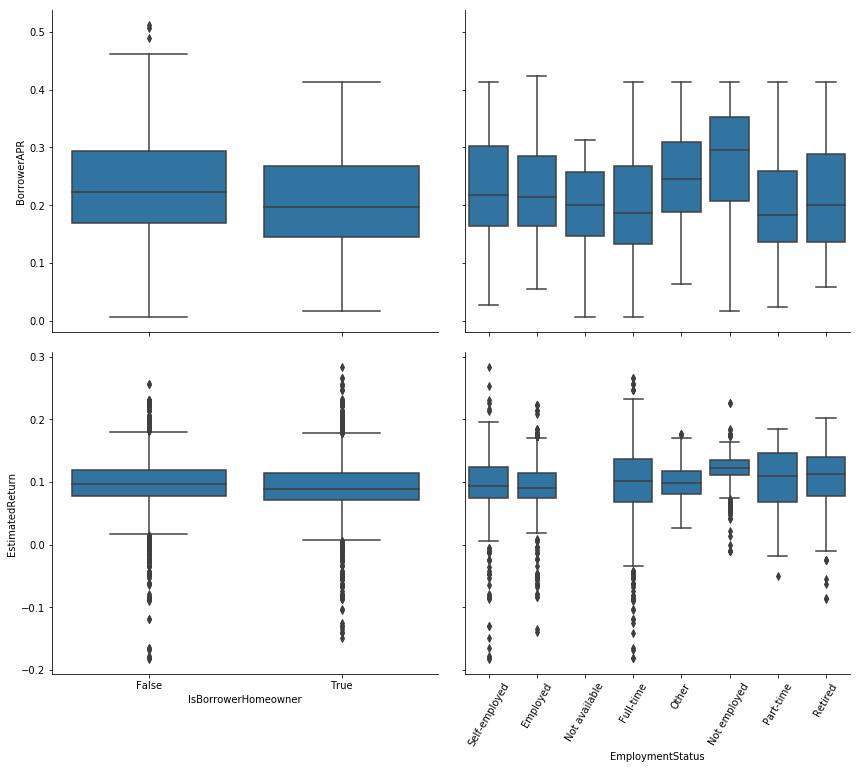

In [42]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['IsBorrowerHomeowner', 'EmploymentStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Term and Loan Status</b>

<Figure size 1296x1080 with 0 Axes>

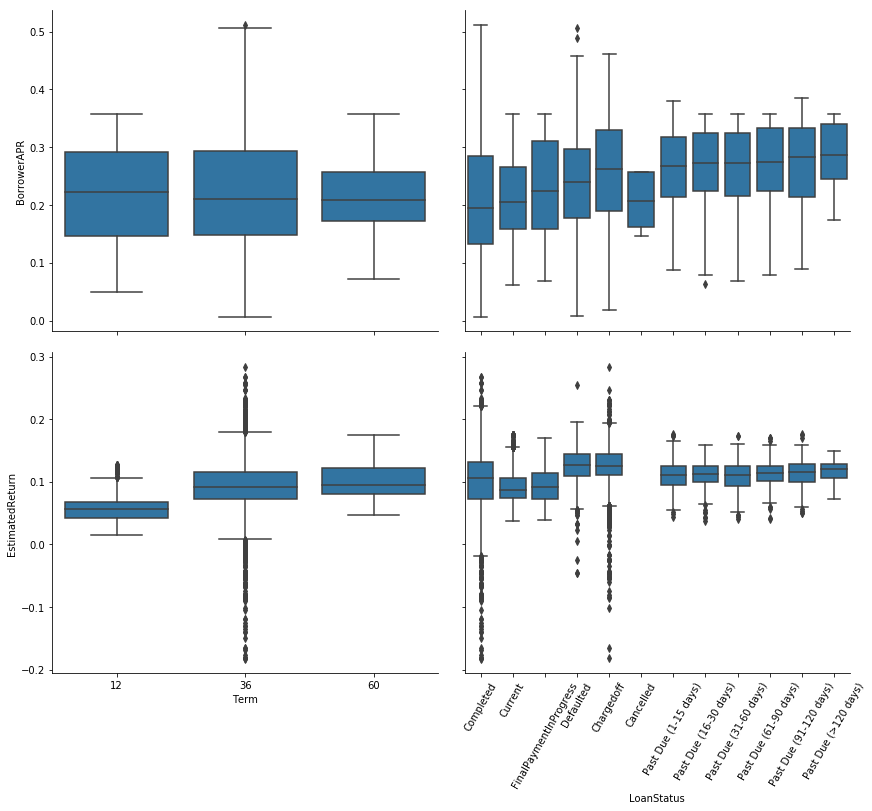

In [43]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['Term', 'LoanStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

## Multivariable Exploration of Data

In [50]:
df2_business = df2[df2['ListingCategory'] == "Business"]

<Figure size 1296x720 with 0 Axes>

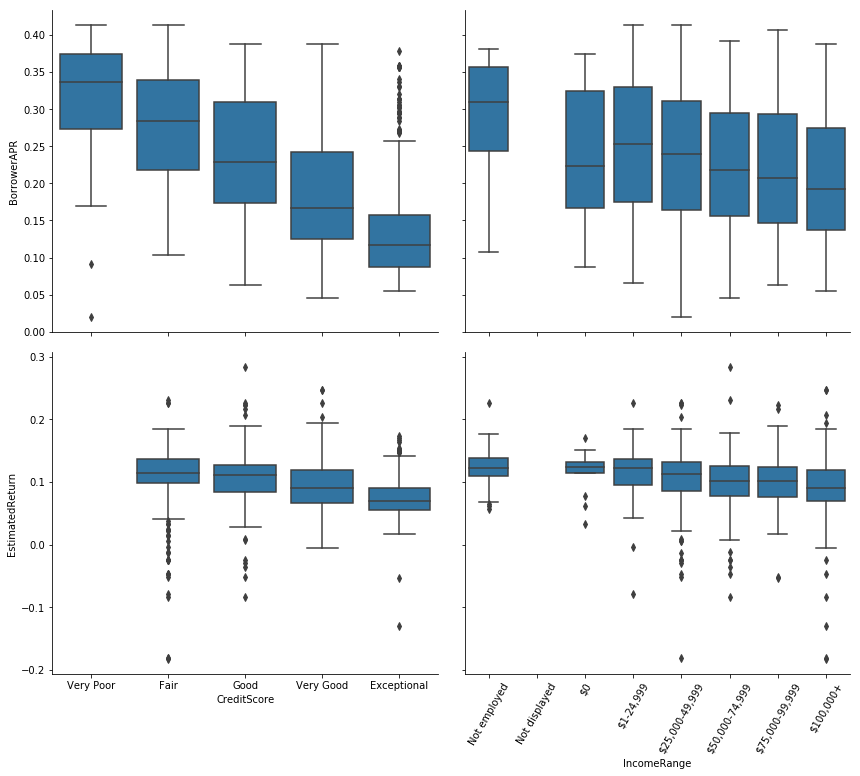

In [52]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df2_business, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Is Homeowner and Employment Status</b>

<Figure size 1296x1080 with 0 Axes>

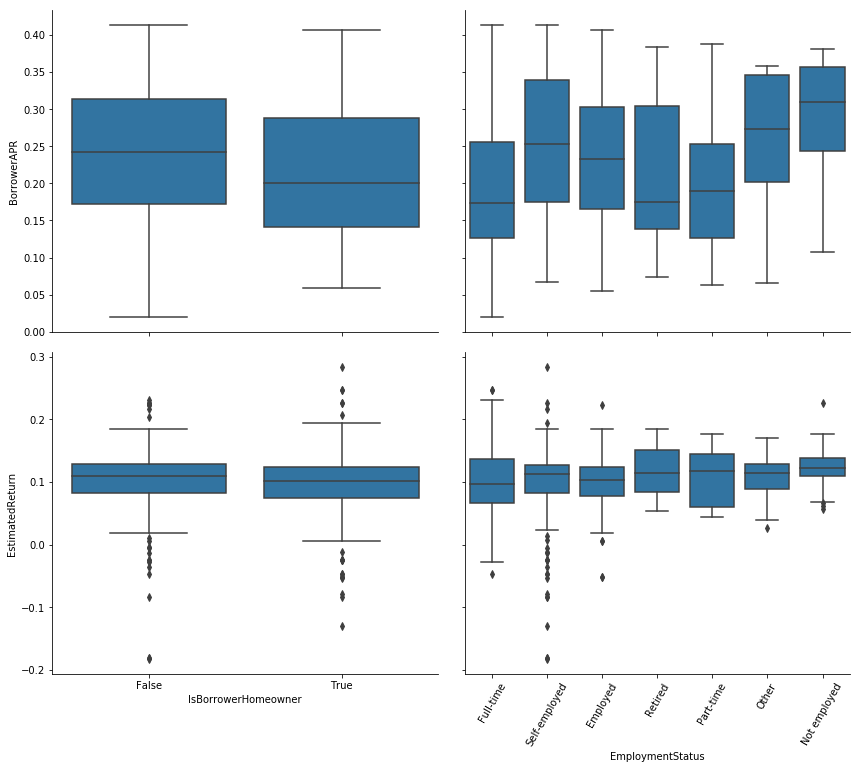

In [53]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2_business, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['IsBorrowerHomeowner', 'EmploymentStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

<b>BorrowerAPR and Estimated Return VS Term and Loan Status</b>

<Figure size 1296x1080 with 0 Axes>

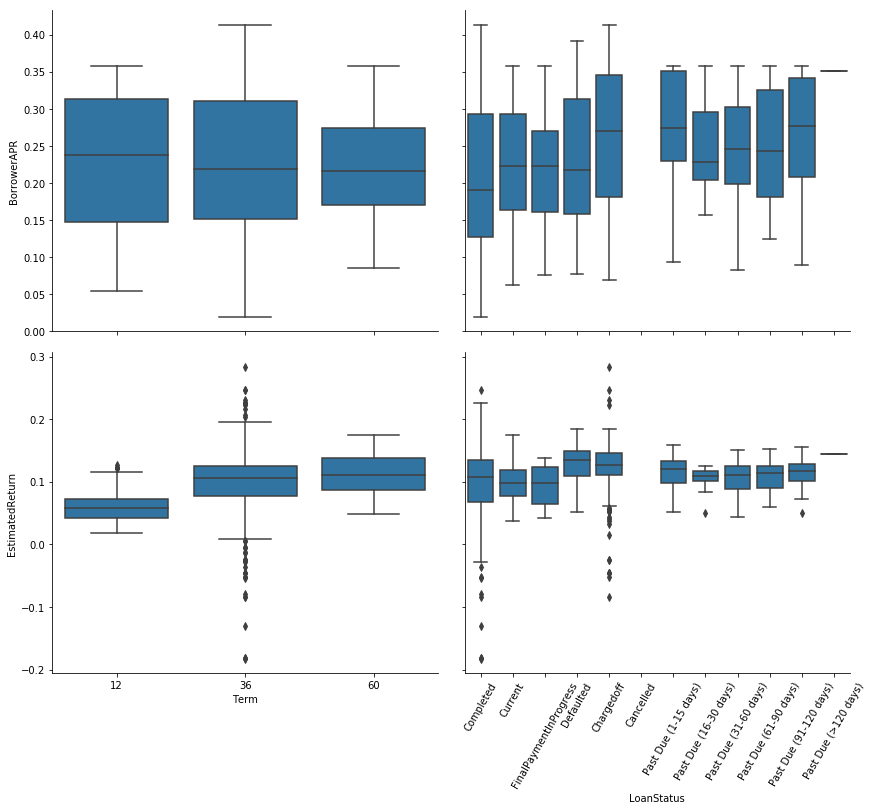

In [54]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df2_business, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['Term', 'LoanStatus'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

In [59]:
df2_sub.CreditScore.value_counts()

Good           40692
Fair           33502
Very Good      18540
Very Poor       5131
Exceptional     4372
Name: CreditScore, dtype: int64

TypeError: zip argument #2 must support iteration

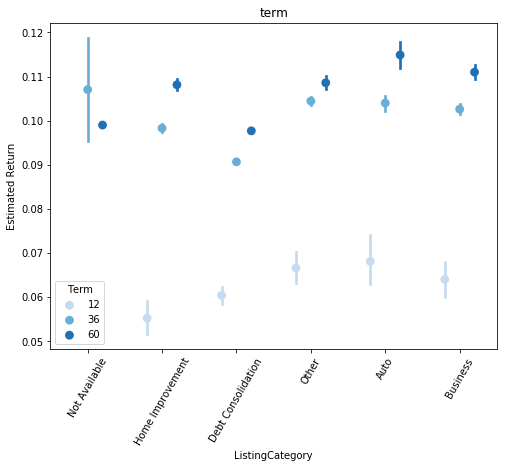

In [95]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('term')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)
plt.legend(2)
plt.show();


In [83]:
df2_60 = df2_sub[df2_sub['Term'] == 60]

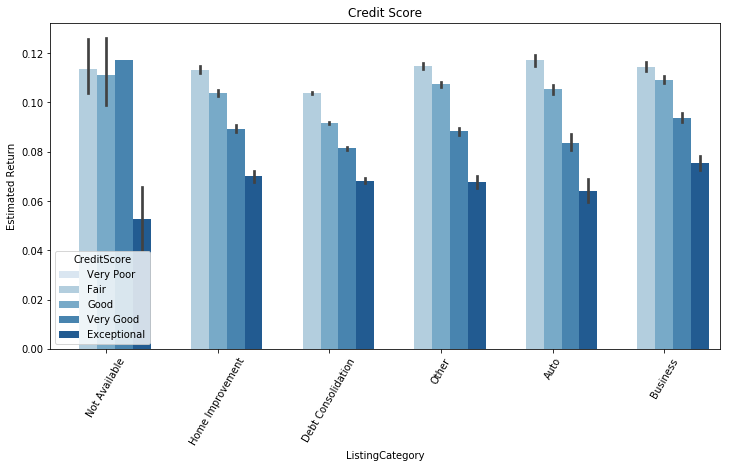

In [89]:
fig = plt.figure(figsize = [12,6])
ax = sb.barplot(data = df2_sub, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'CreditScore', palette = 'Blues')
plt.title('Credit Score')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)

plt.show();


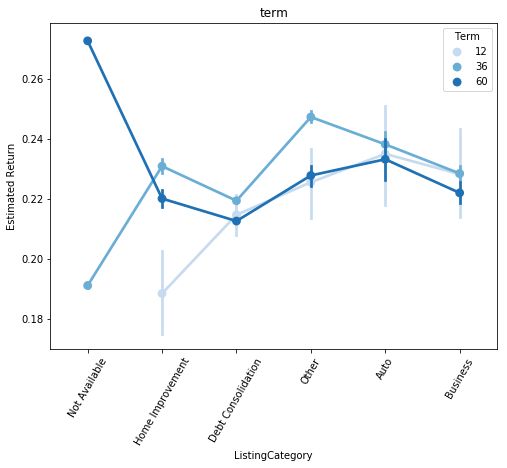

In [94]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2_sub, x = 'ListingCategory', y = 'BorrowerAPR',  hue = 'Term', palette = 'Blues')
plt.title('term')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)

plt.show();